In [241]:
# Import necessary libraries
from openbb_terminal.sdk import openbb
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import requests

%matplotlib inline

In [242]:
# Load AMZN 10-year historical dataframe
amzn_daily = openbb.stocks.load(
        symbol = 'AMZN',
        start_date = '2013-04-01',
        end_date= '2023-04-17',
        monthly = False
)
amzn_daily.head()


Loading Daily data for AMZN with starting period 2013-04-01.

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
date,,,,,,,,
2013-04-01,13.3490,13.3700,13.0505,13.0805,13.0805,50496000,0.0,0.0
2013-04-02,13.1200,13.2945,13.0275,13.1660,13.1660,52622000,0.0,0.0
2013-04-03,13.1060,13.1835,12.8875,12.9515,12.9515,48276000,0.0,0.0
2013-04-04,12.9615,13.0205,12.8060,12.9540,12.9540,39288000,0.0,0.0
2013-04-05,12.7860,12.8090,12.6835,12.7740,12.7740,51148000,0.0,0.0


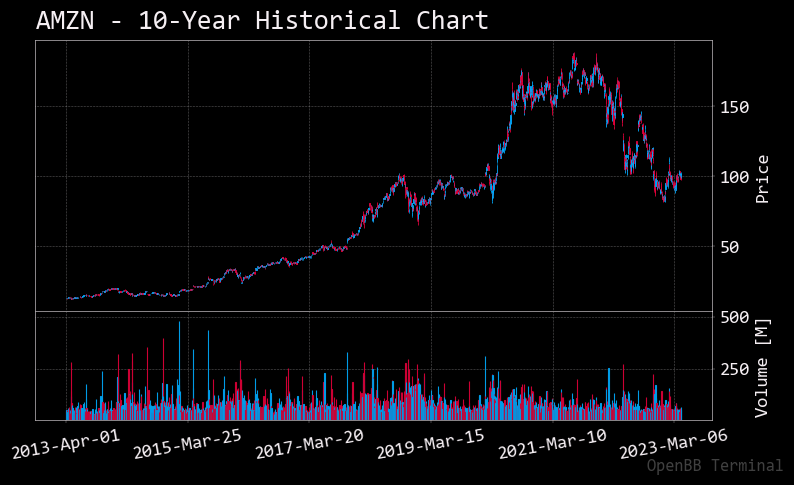

In [290]:
# Use candle function to input 10-Year AMZN data
openbb.stocks.candle(
    data = amzn_daily,
    asset_type = 'AMZN - 10-Year Historical Chart',
    symbol = ''
)

In [244]:
# Call headlines function to retrieve latest news sentiment
openbb.stocks.ba.headlines("AMZN")

,Sentiment Analysis
date,
2023-04-05,0.246
2023-04-06,0.193
2023-04-07,0.101
2023-04-10,0.248
2023-04-11,0.204
2023-04-12,0.312
2023-04-13,0.407
2023-04-14,0.216
2023-04-17,0.063


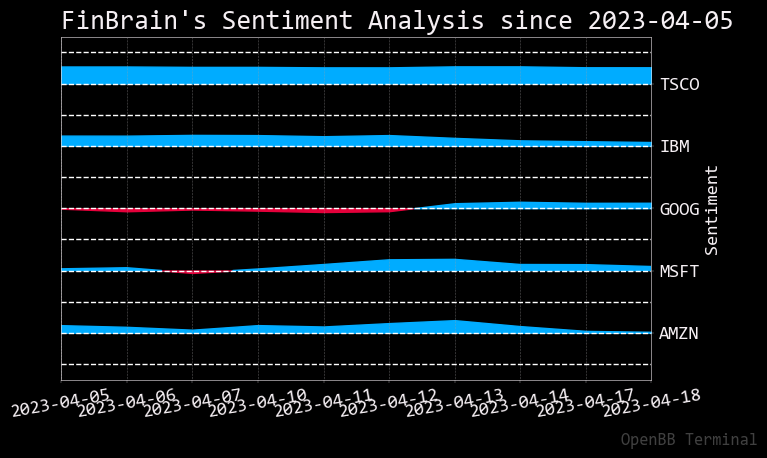

In [245]:
# Sentiment analysis chart for AMZN, MSFT, GOOG, IBM, TSCO
openbb.stocks.ca.sentiment_chart(["AMZN", "MSFT", "GOOG", "IBM", "TSCO"])

In [246]:
# Use scorr function to calculate the correlation between competitors stock prices
openbb.stocks.ca.scorr(["AMZN", "MSFT", "GOOG", "IBM", "TSCO"])

(          AMZN      MSFT      GOOG       IBM      TSCO
 AMZN  1.000000  0.566868 -0.201339  0.473132  0.446491
 MSFT  0.566868  1.000000  0.282191 -0.255745 -0.091846
 GOOG -0.201339  0.282191  1.000000 -0.889721  0.225331
 IBM   0.473132 -0.255745 -0.889721  1.000000  0.107943
 TSCO  0.446491 -0.091846  0.225331  0.107943  1.000000,
              AMZN   MSFT   GOOG    IBM   TSCO
 2023-04-05  0.246  0.054 -0.016  0.329  0.547
 2023-04-06  0.193  0.089 -0.099  0.327  0.547
 2023-04-07  0.101 -0.079 -0.043  0.352  0.534
 2023-04-10  0.248  0.049 -0.079  0.345  0.534
 2023-04-11  0.204  0.192 -0.124  0.309  0.519
 2023-04-12  0.312  0.343 -0.096  0.346  0.519
 2023-04-13  0.407  0.358  0.159  0.256  0.551
 2023-04-14  0.216  0.193  0.206  0.177  0.551
 2023-04-17  0.063  0.188  0.172  0.149  0.522
 2023-04-18  0.033  0.128  0.174  0.123  0.522)

In [247]:
# Use Put-Call Ratios (pcr) function to analyze changes in sentiment over 10-Year period
openbb.stocks.options.pcr(start_date = '2013-04-01', window = 10, symbol = 'AMZN')

,PCR
Date,
2013-04-19,0.788200
2013-04-22,0.550400
2013-04-23,0.190000
2013-04-24,0.563700
2013-04-25,0.869200
...,...
2023-04-12,0.455582
2023-04-13,0.323027
2023-04-14,0.679352


In [248]:
# Use chains function to retrieve options chain data to analyze
openbb.stocks.options.chains(symbol = 'AMZN')

,optionType,expiration,strike,lastPrice,bid,ask,openInterest,volume
0,call,2023-04-21,45.0,57.00,56.80,58.00,104,0
1,put,2023-04-21,45.0,0.01,0.00,0.01,11946,0
2,call,2023-04-21,50.0,51.98,51.80,53.00,119,4
3,put,2023-04-21,50.0,0.01,0.00,0.01,2249,0
4,call,2023-04-21,55.0,47.15,46.75,48.00,96,19
...,...,...,...,...,...,...,...,...
2247,put,2025-12-19,160.0,59.30,57.00,59.40,0,1
2248,call,2025-12-19,165.0,9.10,7.95,10.25,150,1
2249,put,2025-12-19,165.0,61.98,61.75,64.20,0,1
2250,call,2025-12-19,170.0,8.25,7.55,8.45,827,18


In [249]:
amzn_daily = openbb.forecast.ema(amzn_daily, target_column="Close", period=30)
amzn_daily.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,EMA_30
date,,,,,,,,,
2013-04-01,13.3490,13.3700,13.0505,13.0805,13.0805,50496000,0.0,0.0,13.080500
2013-04-02,13.1200,13.2945,13.0275,13.1660,13.1660,52622000,0.0,0.0,13.086016
2013-04-03,13.1060,13.1835,12.8875,12.9515,12.9515,48276000,0.0,0.0,13.077337
2013-04-04,12.9615,13.0205,12.8060,12.9540,12.9540,39288000,0.0,0.0,13.069380
2013-04-05,12.7860,12.8090,12.6835,12.7740,12.7740,51148000,0.0,0.0,13.050323


In [250]:
amzn_daily = openbb.forecast.ema(amzn_daily, target_column="Close", period=150)
amzn_daily.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,EMA_30,EMA_150
date,,,,,,,,,,
2013-04-01,13.3490,13.3700,13.0505,13.0805,13.0805,50496000,0.0,0.0,13.080500,13.080500
2013-04-02,13.1200,13.2945,13.0275,13.1660,13.1660,52622000,0.0,0.0,13.086016,13.081632
2013-04-03,13.1060,13.1835,12.8875,12.9515,12.9515,48276000,0.0,0.0,13.077337,13.079909
2013-04-04,12.9615,13.0205,12.8060,12.9540,12.9540,39288000,0.0,0.0,13.069380,13.078241
2013-04-05,12.7860,12.8090,12.6835,12.7740,12.7740,51148000,0.0,0.0,13.050323,13.074211


In [251]:
amzn_daily_ema = amzn_daily[["Close", "EMA_30", "EMA_150"]]
amzn_daily_ema

,Close,EMA_30,EMA_150
date,,,
2013-04-01,13.080500,13.080500,13.080500
2013-04-02,13.166000,13.086016,13.081632
2013-04-03,12.951500,13.077337,13.079909
2013-04-04,12.954000,13.069380,13.078241
2013-04-05,12.774000,13.050323,13.074211
...,...,...,...
2023-04-10,102.169998,98.951656,103.272220
2023-04-11,99.919998,99.014130,103.227820
2023-04-12,97.830002,98.937734,103.156325


In [252]:
# Initialize the new Signal column
amzn_daily_ema['Signal'] = 0.0

# When ema_30 are greater than or equal to ema_120, generate signal to buy stock long
amzn_daily_ema.loc[(amzn_daily_ema['EMA_30'] >= amzn_daily_ema['EMA_150']), 'Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
amzn_daily_ema.loc[(amzn_daily_ema['EMA_30'] < amzn_daily_ema['EMA_150']), 'Signal'] = -1

# Review the DataFrame
display(amzn_daily_ema.head())
display(amzn_daily_ema.tail())

,Close,EMA_30,EMA_150,Signal
date,,,,
2013-04-01,13.0805,13.080500,13.080500,1.0
2013-04-02,13.1660,13.086016,13.081632,1.0
2013-04-03,12.9515,13.077337,13.079909,-1.0
2013-04-04,12.9540,13.069380,13.078241,-1.0
2013-04-05,12.7740,13.050323,13.074211,-1.0


,Close,EMA_30,EMA_150,Signal
date,,,,
2023-04-10,102.169998,98.951656,103.272220,-1.0
2023-04-11,99.919998,99.014130,103.227820,-1.0
2023-04-12,97.830002,98.937734,103.156325,-1.0
2023-04-13,102.400002,99.161106,103.146308,-1.0
2023-04-14,102.510002,99.377164,103.137880,-1.0


In [253]:
amzn_daily_ema['Signal'].value_counts()

 1.0    1832
-1.0     697
Name: Signal, dtype: int64

In [254]:
amzn_daily_ema["Actual Returns"] = amzn_daily_ema["Close"].pct_change()
amzn_daily_ema = amzn_daily_ema.dropna()
amzn_daily_ema.head()

,Close,EMA_30,EMA_150,Signal,Actual Returns
date,,,,,
2013-04-02,13.1660,13.086016,13.081632,1.0,0.006537
2013-04-03,12.9515,13.077337,13.079909,-1.0,-0.016292
2013-04-04,12.9540,13.069380,13.078241,-1.0,0.000193
2013-04-05,12.7740,13.050323,13.074211,-1.0,-0.013895
2013-04-08,12.9475,13.043690,13.072533,-1.0,0.013582


In [255]:
# Calculate the strategy returns and add them to the signals_df DataFrame
amzn_daily_ema['Strategy Returns'] = amzn_daily_ema['Actual Returns'] * amzn_daily_ema['Signal'].shift()

# Review the DataFrame
display(amzn_daily_ema.head())
display(amzn_daily_ema.tail())

,Close,EMA_30,EMA_150,Signal,Actual Returns,Strategy Returns
date,,,,,,
2013-04-02,13.1660,13.086016,13.081632,1.0,0.006537,NaN
2013-04-03,12.9515,13.077337,13.079909,-1.0,-0.016292,-0.016292
2013-04-04,12.9540,13.069380,13.078241,-1.0,0.000193,-0.000193
2013-04-05,12.7740,13.050323,13.074211,-1.0,-0.013895,0.013895
2013-04-08,12.9475,13.043690,13.072533,-1.0,0.013582,-0.013582


,Close,EMA_30,EMA_150,Signal,Actual Returns,Strategy Returns
date,,,,,,
2023-04-10,102.169998,98.951656,103.272220,-1.0,0.001078,-0.001078
2023-04-11,99.919998,99.014130,103.227820,-1.0,-0.022022,0.022022
2023-04-12,97.830002,98.937734,103.156325,-1.0,-0.020917,0.020917
2023-04-13,102.400002,99.161106,103.146308,-1.0,0.046714,-0.046714
2023-04-14,102.510002,99.377164,103.137880,-1.0,0.001074,-0.001074


In [256]:
# Assign a copy of the EMA_30 and EMA_150 columns to a features DataFrame called X
X = amzn_daily_ema[['EMA_30', 'EMA_150']].shift().dropna()

# Review the DataFrame
X.head()

,EMA_30,EMA_150
date,,
2013-04-03,13.086016,13.081632
2013-04-04,13.077337,13.079909
2013-04-05,13.069380,13.078241
2013-04-08,13.050323,13.074211
2013-04-09,13.043690,13.072533


In [257]:
# Create the target set selecting the Signal column and assiging it to y
y = amzn_daily_ema['Signal']

# Review the value counts
y.value_counts()

 1.0    1831
-1.0     697
Name: Signal, dtype: int64

In [258]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2013-04-03 00:00:00


In [259]:
# Select the ending period for the training data with an offset of 84 months
training_end = X.index.min() + DateOffset(months=36)

# Display the training end date
print(training_end)

2016-04-03 00:00:00


In [260]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Review the X_train DataFrame
X_train.tail()

,EMA_30,EMA_150
date,,
2016-03-28,28.204736,28.157925
2016-03-29,28.255624,28.168992
2016-03-30,28.348358,28.189177
2016-03-31,28.450689,28.212294
2016-04-01,28.530129,28.231761


In [261]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end+DateOffset(months=12):]
y_test = y.loc[training_end+DateOffset(months=12):]

# Review the X_test DataFrame
X_test.head()

,EMA_30,EMA_150
date,,
2017-04-03,42.552684,39.987036
2017-04-04,42.683188,40.047810
2017-04-05,42.854692,40.117926
2017-04-06,43.023034,40.188735
2017-04-07,43.145032,40.251321


In [262]:
# Scale the features DataFrames
# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [263]:
# From SVM, instantiate SVC classifier model instance
svm_model = SVC()
 
# # Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)
 
# # Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_scaled)

# # Review the model's predicted values
svm_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [264]:
# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_test, svm_pred)

# Print the classification report
print(svm_testing_report)

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       468
         1.0       0.69      1.00      0.82      1051

    accuracy                           0.69      1519
   macro avg       0.35      0.50      0.41      1519
weighted avg       0.48      0.69      0.57      1519



In [265]:
# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
predictions_df['Predicted'] = svm_pred

# Add the actual returns to the DataFrame
predictions_df['Actual Returns'] = amzn_daily_ema['Actual Returns']

# Add the strategy returns to the DataFrame
predictions_df['Strategy Returns'] = predictions_df["Actual Returns"] * svm_pred

# Review the DataFrame
display(predictions_df.head())
display(predictions_df.tail())

,Predicted,Actual Returns,Strategy Returns
date,,,
2017-04-03,1.0,0.005606,0.005606
2017-04-04,1.0,0.017184,0.017184
2017-04-05,1.0,0.002702,0.002702
2017-04-06,1.0,-0.012097,-0.012097
2017-04-07,1.0,-0.003785,-0.003785


,Predicted,Actual Returns,Strategy Returns
date,,,
2023-04-10,1.0,0.001078,0.001078
2023-04-11,1.0,-0.022022,-0.022022
2023-04-12,1.0,-0.020917,-0.020917
2023-04-13,1.0,0.046714,0.046714
2023-04-14,1.0,0.001074,0.001074


In [266]:
# Import a new classifier from SKLearn
from sklearn.linear_model import LogisticRegression

# Initiate the model instance
logistic_reg_model = LogisticRegression()

In [267]:
# Fit the model using the training data
model = logistic_reg_model.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
log_pred = logistic_reg_model.predict(X_test_scaled)

# Review the model's predicted values
log_pred

array([ 1.,  1.,  1., ..., -1., -1., -1.])

In [268]:
# Use a classification report to evaluate the model using the predictions and testing data
logistic_reg_report = classification_report(y_test, log_pred)

# Print the classification report
print(logistic_reg_report)

              precision    recall  f1-score   support

        -1.0       0.67      1.00      0.80       468
         1.0       1.00      0.78      0.87      1051

    accuracy                           0.85      1519
   macro avg       0.83      0.89      0.84      1519
weighted avg       0.90      0.85      0.85      1519



Loading Daily data for AMZN with starting period 2020-04-14.

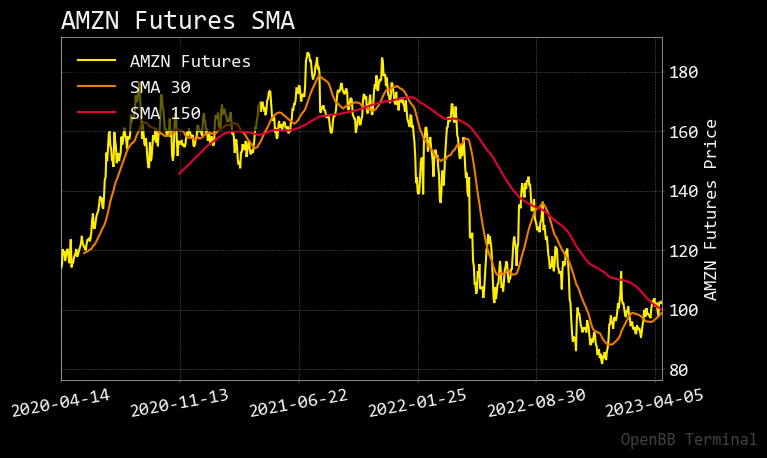

In [269]:
# Amazon Simple Moving Average
amzn = openbb.stocks.load("AMZN")

openbb.ta.ma_chart(
    data = amzn['Adj Close'],
    symbol = 'AMZN Futures',
    ma_type = 'SMA',
    window = [30, 150])

Loading Daily data for AMZN with starting period 2020-04-14.

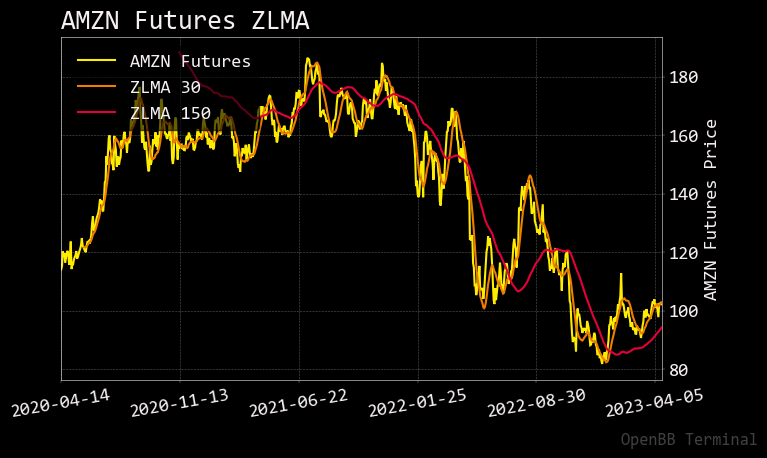

In [270]:
# Use Zero-Lag Moving Average to calculate and plot on adjusted close prices
amzn = openbb.stocks.load("AMZN")

openbb.ta.ma_chart(
    data = amzn['Adj Close'],
    symbol = 'AMZN Futures',
    ma_type = 'ZLMA',
    window = [30, 150])

In [271]:
# Use Average True Range (atr) to calculate recent trends and potential risk and reward
ticker = 'AMZN'
start = '2013-04-01'

df_atr = openbb.ta.atr(data = openbb.stocks.load(f"{ticker}", start_date = f"{start}", monthly = True), window = 6)

df_atr.tail(5)

Loading Monthly data for AMZN with starting period 2013-04-01.

,ATRe_6
date,
2022-12-01,21.609155
2023-01-01,21.737967
2023-02-01,21.721405
2023-03-01,19.906717
2023-04-01,16.073368


In [272]:
# Use donchian function to calculate the donchian channel using the 10-Year historical data
ticker = 'AMZN'
start = '2013-04-01'
data_df: pd.DataFrame = openbb.stocks.load(f"{ticker}", start_date = f"{start}", monthly = True)

donchian = openbb.ta.donchian(data_df)

data_df = data_df.join(donchian)

data_df.tail(5)

Loading Monthly data for AMZN with starting period 2013-04-01.

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,DCL_20_20,DCM_20_20,DCU_20_20
date,,,,,,,,,,,
2022-12-01,96.989998,97.230003,81.690002,84.000000,84.000000,1549193300,0.0,0.0,81.690002,135.172005,188.654007
2023-01-01,85.459999,103.489998,81.430000,103.129997,103.129997,1523798600,0.0,0.0,81.430000,135.042004,188.654007
2023-02-01,102.529999,114.000000,92.320000,94.230003,94.230003,1364102000,0.0,0.0,81.430000,135.042004,188.654007
2023-03-01,93.870003,103.489998,88.120003,103.290001,103.290001,1349194300,0.0,0.0,81.430000,134.768749,188.107498
2023-04-01,102.300003,104.199997,97.709999,102.300003,102.300003,571942918,0.0,0.0,81.430000,134.768749,188.107498


Loading Monthly data for AMZN with starting period 2013-04-01.

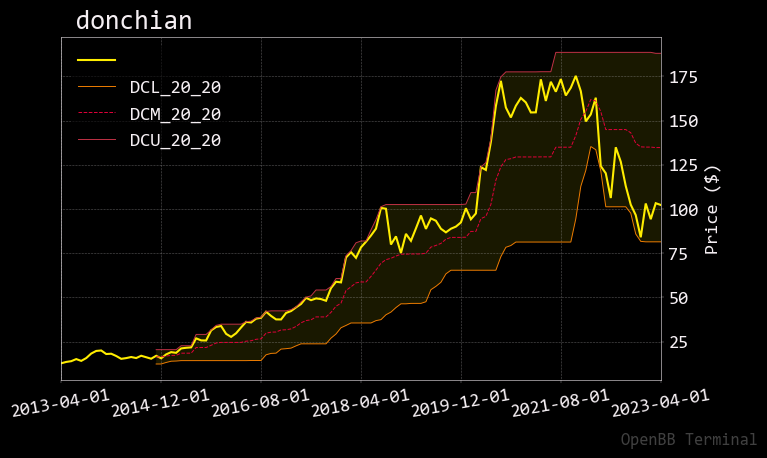

In [273]:
# Plot Donchian channel
ticker = 'AMZN'
start = '2013-04-01'
data_df: pd.DataFrame = openbb.stocks.load(f"{ticker}", start_date = f"{start}", monthly = True)

openbb.ta.donchian_chart(data_df)

Loading Intraday 60min data for AMZN with starting period 2023-04-01.

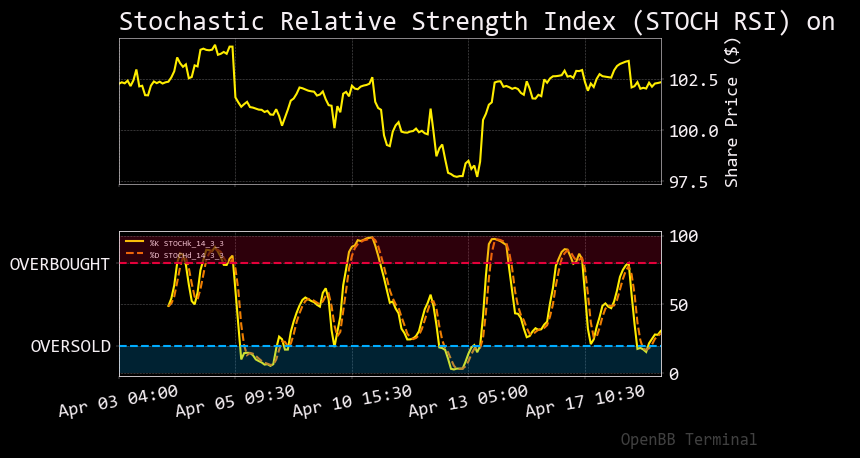

In [274]:
# Use Stochastic RSI to identify overbought and oversold conditions of AMZN stock
openbb.ta.stoch_chart(data= openbb.stocks.load('AMZN', start_date = '2023-04-01', interval = 60, prepost = True))

In [275]:
# Load 10-Year historical dataframe for AMZN
amzn = openbb.stocks.load('AMZN', start_date = '2013-04-01')

amzn.tail()

Loading Daily data for AMZN with starting period 2013-04-01.

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
date,,,,,,,,
2023-04-12,100.400002,100.510002,97.709999,97.830002,97.830002,56735000,0.0,0.0
2023-04-13,98.949997,102.570000,98.709999,102.400002,102.400002,67925100,0.0,0.0
2023-04-14,102.070000,103.199997,101.110001,102.510002,102.510002,51388300,0.0,0.0
2023-04-17,103.160004,103.730003,101.589996,102.739998,102.739998,39919500,0.0,0.0
2023-04-18,103.949997,104.199997,101.519997,102.300003,102.300003,39723900,0.0,0.0


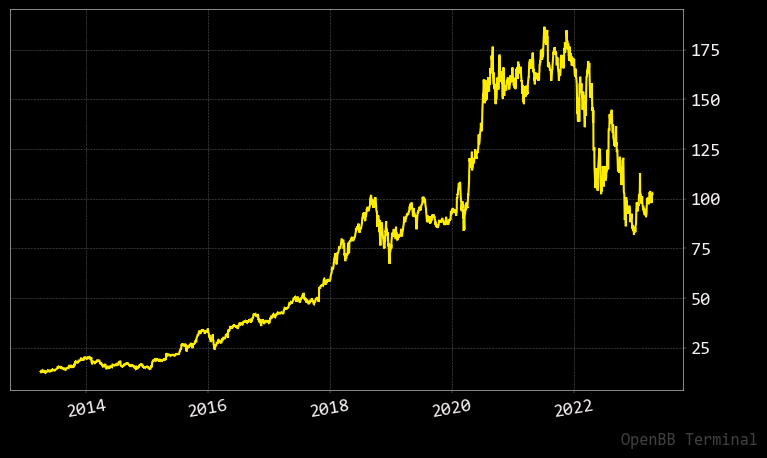

In [276]:
# Plot Adj Close column
openbb.forecast.plot(data=amzn, columns = ['Adj Close'])

  0%|          | 0/391 [00:00<?, ?it/s]

Theta Model obtains MAPE: 4.79%

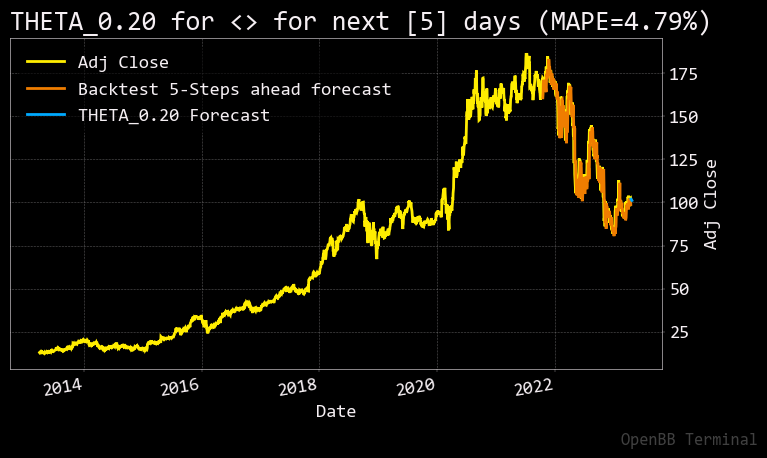

   Actual price: 102.30    
┏━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Datetime   ┃ Prediction ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ 2023-04-19 │ 101.95     │
├────────────┼────────────┤
│ 2023-04-20 │ 101.76     │
├────────────┼────────────┤
│ 2023-04-21 │ 101.63     │
├────────────┼────────────┤
│ 2023-04-24 │ 101.36     │
├────────────┼────────────┤
│ 2023-04-25 │ 101.19     │
└────────────┴────────────┘

In [277]:
# Use Theta Method Forecast for Adj Close column
openbb.forecast.theta_chart(data = amzn, target_column = 'Adj Close')

In [278]:
# 150-day Exponential Moving Average (EMA) of the adjusted close price
amzn = openbb.forecast.ema(amzn, target_column = 'Adj Close', period = 150)

amzn.tail(3)

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,date,EMA_150
2528,102.070000,103.199997,101.110001,102.510002,102.510002,51388300,0.0,0.0,2023-04-14,103.137880
2529,103.160004,103.730003,101.589996,102.739998,102.739998,39919500,0.0,0.0,2023-04-17,103.132610
2530,103.949997,104.199997,101.519997,102.300003,102.300003,39723900,0.0,0.0,2023-04-18,103.121582


In [279]:
# 30-day Exponential Moving Average (EMA) of the adjusted close price
amzn = openbb.forecast.ema(amzn, target_column = 'Adj Close', period = 30)

amzn.tail(3)

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,date,EMA_150,EMA_30
2528,102.070000,103.199997,101.110001,102.510002,102.510002,51388300,0.0,0.0,2023-04-14,103.137880,99.377164
2529,103.160004,103.730003,101.589996,102.739998,102.739998,39919500,0.0,0.0,2023-04-17,103.132610,99.594121
2530,103.949997,104.199997,101.519997,102.300003,102.300003,39723900,0.0,0.0,2023-04-18,103.121582,99.768694


In [280]:
# Add 10-day Relative Strength Index (RSI) column
amzn = openbb.forecast.rsi(amzn, target_column = 'Adj Close', period = 10)

amzn.tail(3)

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,date,EMA_150,EMA_30,RSI_10_Adj Close
2528,102.070000,103.199997,101.110001,102.510002,102.510002,51388300,0.0,0.0,2023-04-14,103.137880,99.377164,57.571994
2529,103.160004,103.730003,101.589996,102.739998,102.739998,39919500,0.0,0.0,2023-04-17,103.132610,99.594121,58.218146
2530,103.949997,104.199997,101.519997,102.300003,102.300003,39723900,0.0,0.0,2023-04-18,103.121582,99.768694,56.392613


In [281]:
# Add 5-day RSI column
amzn = openbb.forecast.rsi(amzn, target_column = 'Adj Close', period = 5)

amzn.tail(3)

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,date,EMA_150,EMA_30,RSI_10_Adj Close,RSI_5_Adj Close
2528,102.070000,103.199997,101.110001,102.510002,102.510002,51388300,0.0,0.0,2023-04-14,103.137880,99.377164,57.571994,59.323284
2529,103.160004,103.730003,101.589996,102.739998,102.739998,39919500,0.0,0.0,2023-04-17,103.132610,99.594121,58.218146,60.608968
2530,103.949997,104.199997,101.519997,102.300003,102.300003,39723900,0.0,0.0,2023-04-18,103.121582,99.768694,56.392613,56.349856


In [282]:
# Add Stochastic Oscillator column
amzn = openbb.forecast.sto(
    dataset = amzn,
    high_column='High',
    low_column = 'Low',
    close_column = 'Adj Close',
    period = 5
)

amzn.tail(3)

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,date,EMA_150,EMA_30,RSI_10_Adj Close,RSI_5_Adj Close,SO%K_5,SO%D_5
2528,102.070000,103.199997,101.110001,102.510002,102.510002,51388300,0.0,0.0,2023-04-14,103.137880,99.377164,57.571994,59.323284,87.431784,61.956469
2529,103.160004,103.730003,101.589996,102.739998,102.739998,39919500,0.0,0.0,2023-04-17,103.132610,99.594121,58.218146,60.608968,83.554738,89.162872
2530,103.949997,104.199997,101.519997,102.300003,102.300003,39723900,0.0,0.0,2023-04-18,103.121582,99.768694,56.392613,56.349856,70.724275,80.570266


In [283]:
amzn.rename(columns = {
    'RSI_5_Adj Close': 'RSI_10_Adj Close',
    'SO%K_5': 'STO_Slow',
    'SO%D_5': 'STO_Fast'}, inplace = True)

In [284]:
amzn.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends',
       'Stock Splits', 'date', 'EMA_150', 'EMA_30', 'RSI_10_Adj Close',
       'RSI_10_Adj Close', 'STO_Slow', 'STO_Fast'],
      dtype='object')

In [285]:
openbb.forecast.delete(amzn, 'Close')

In [286]:
amzn = openbb.forecast.rename(amzn, 'Adj Close', 'Close')

amzn.tail(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,EMA_150,EMA_30,RSI_10_Adj Close,RSI_10_Adj Close,STO_Slow,STO_Fast
2530,103.949997,104.199997,101.519997,102.300003,39723900,0.0,0.0,2023-04-18,103.121582,99.768694,56.392613,56.349856,70.724275,80.570266


Covariate #0: EMA_150

Covariate #1: EMA_30

Predicting Regression for 5 days


  0%|          | 0/917 [00:00<?, ?it/s]

Regression model obtains MAPE: 2.90%

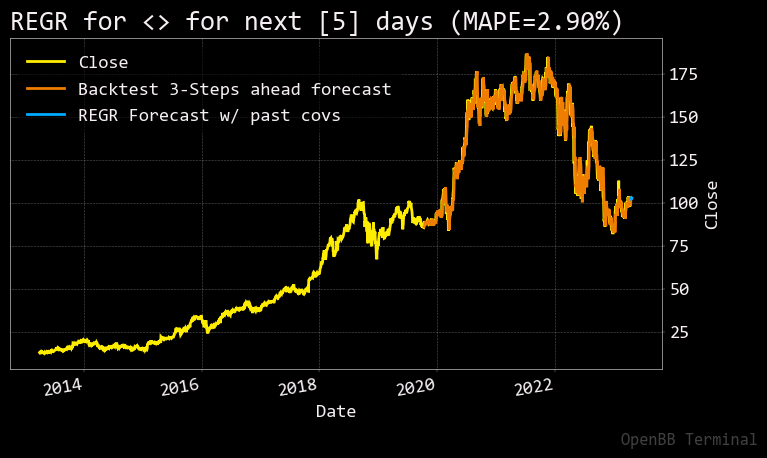

   Actual price: 102.30    
┏━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Datetime   ┃ Prediction ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ 2023-04-19 │ 102.92     │
├────────────┼────────────┤
│ 2023-04-20 │ 102.48     │
├────────────┼────────────┤
│ 2023-04-21 │ 102.22     │
├────────────┼────────────┤
│ 2023-04-24 │ 102.36     │
├────────────┼────────────┤
│ 2023-04-25 │ 102.80     │
└────────────┴────────────┘

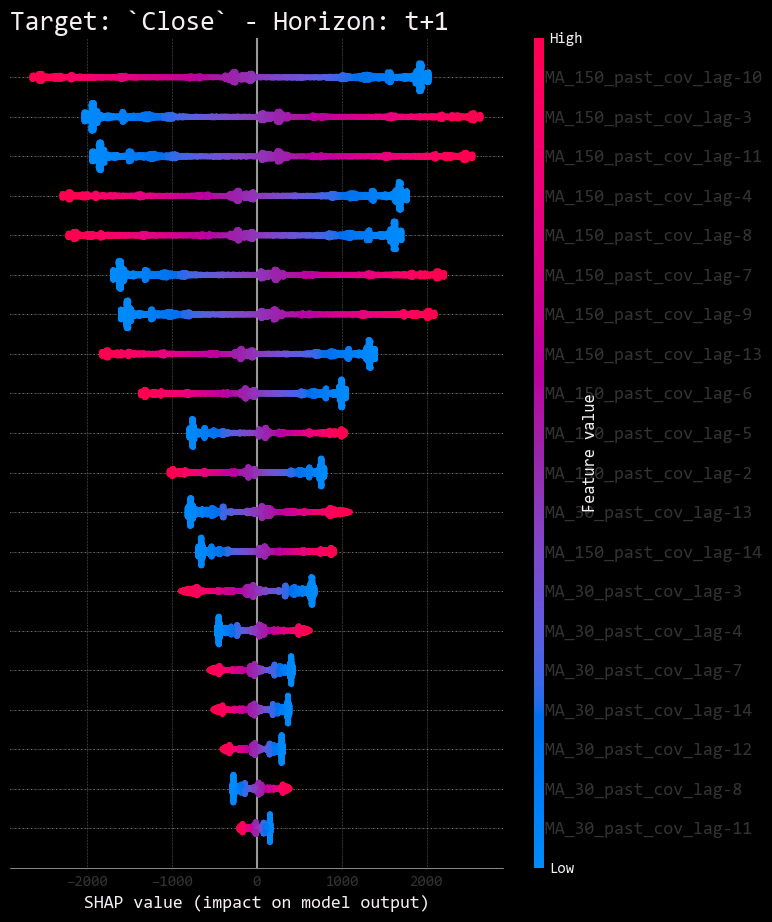

<Figure size 640x480 with 0 Axes>

In [287]:
# Regression model which can forecast with or without past-covariates
#openbb.forecast.regr_chart(amzn, target_column = 'Close')
openbb.forecast.regr_chart(amzn, target_column = 'Close', n_predict= 5, past_covariates= "EMA_150,EMA_30", train_split=.65, forecast_horizon= 3)

Warning: when using past covariates n_predict must equal output_chunk_length. We have changed your output_chunk_length to 30 to match your n_predict

Covariate #0: EMA_150

Covariate #1: EMA_30

Predicting Regression for 30 days


  0%|          | 0/917 [00:00<?, ?it/s]

Regression model obtains MAPE: 2.90%

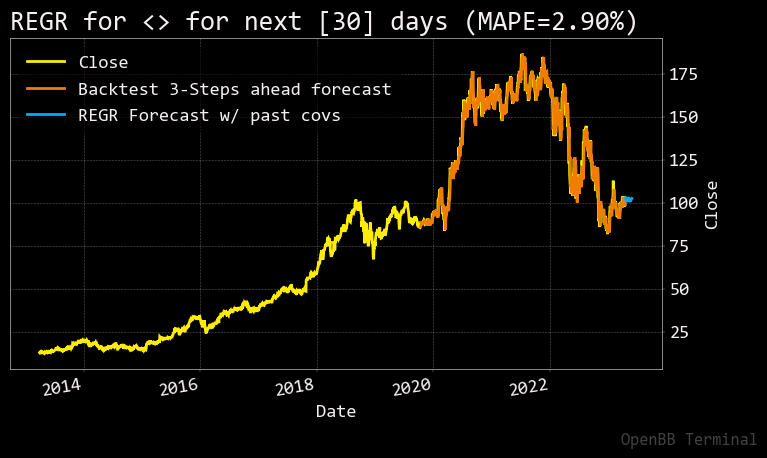

   Actual price: 102.30    
┏━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Datetime   ┃ Prediction ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ 2023-04-19 │ 102.91     │
├────────────┼────────────┤
│ 2023-04-20 │ 102.42     │
├────────────┼────────────┤
│ 2023-04-21 │ 102.20     │
├────────────┼────────────┤
│ 2023-04-24 │ 102.35     │
├────────────┼────────────┤
│ 2023-04-25 │ 102.78     │
├────────────┼────────────┤
│ 2023-04-26 │ 103.09     │
├────────────┼────────────┤
│ 2023-04-27 │ 101.77     │
├────────────┼────────────┤
│ 2023-04-28 │ 101.20     │
├────────────┼────────────┤
│ 2023-05-01 │ 101.02     │
├────────────┼────────────┤
│ 2023-05-02 │ 101.05     │
├────────────┼────────────┤
│ 2023-05-03 │ 101.28     │
├────────────┼────────────┤
│ 2023-05-04 │ 102.04     │
├────────────┼────────────┤
│ 2023-05-05 │ 102.07     │
├────────────┼────────────┤
│ 2023-05-08 │ 101.78     │
├────────────┼────────────┤
│ 2023-05-09 │ 102.53     │
├────────────┼────────────┤
│ 2023-05-10 │ 102.78     │
├────────────┼────────────┤
│ 2023-05-11 │ 102.75     │
├────────────┼────────────┤
│ 2023-05-12 │ 101.92     │
├────────────┼────────────┤
│ 2023-05-15 │ 101.64     │
├────────────┼────────────┤
│ 2023-05-16 │ 101.97     │
├────────────┼────────────┤
│ 2023-05-17 │ 102.40     │
├────────────┼────────────┤
│ 2023-05-18 │ 102.65     │
├────────────┼────────────┤
│ 2023-05-19 │ 101.76     │
├────────────┼────────────┤
│ 2023-05-22 │ 101.76     │
├────────────┼────────────┤
│ 2023-05-23 │ 101.65     │
├────────────┼────────────┤
│ 2023-05-24 │ 101.59     │
├────────────┼────────────┤
│ 2023-05-25 │ 101.86     │
├────────────┼────────────┤
│ 2023-05-26 │ 102.07     │
├────────────┼────────────┤
│ 2023-05-29 │ 102.40     │
├────────────┼────────────┤
│ 2023-05-30 │ 102.57     │
└────────────┴────────────┘

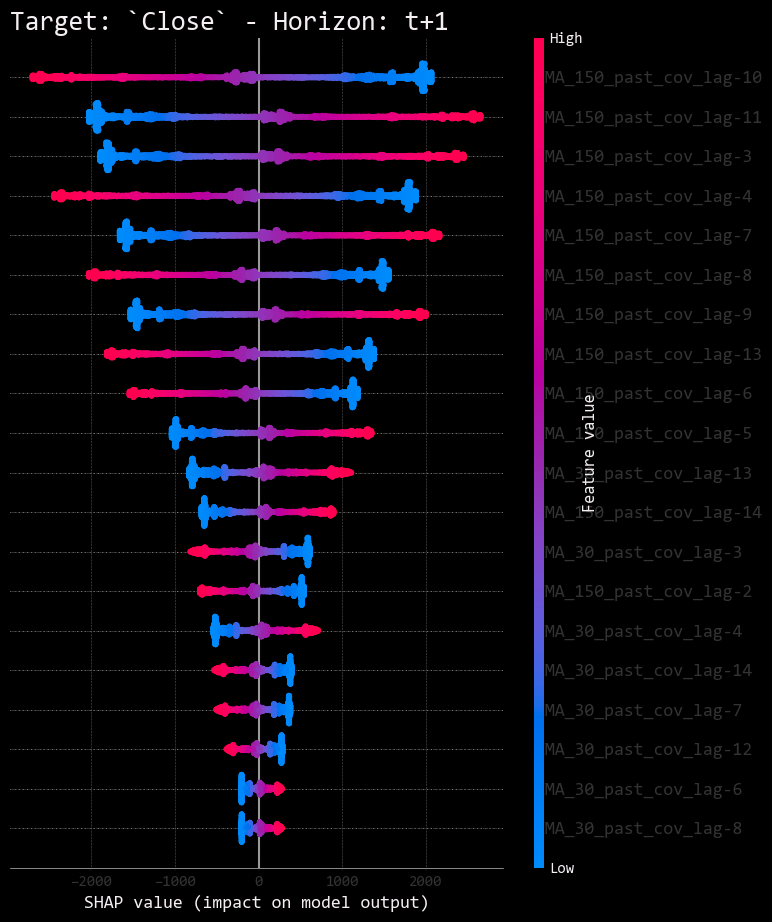

<Figure size 640x480 with 0 Axes>

In [288]:
# Target EMA columns as past-covariates
openbb.forecast.regr_chart(amzn, target_column = 'Close', n_predict= 30, past_covariates= "EMA_150,EMA_30", train_split=.65, forecast_horizon= 3)

Warning: when using past covariates n_predict must equal output_chunk_length. We have changed your output_chunk_length to 30 to match your n_predict

Covariate #0: Volume

Predicting Regression for 30 days


  0%|          | 0/1834 [00:00<?, ?it/s]

Regression model obtains MAPE: 4.21%

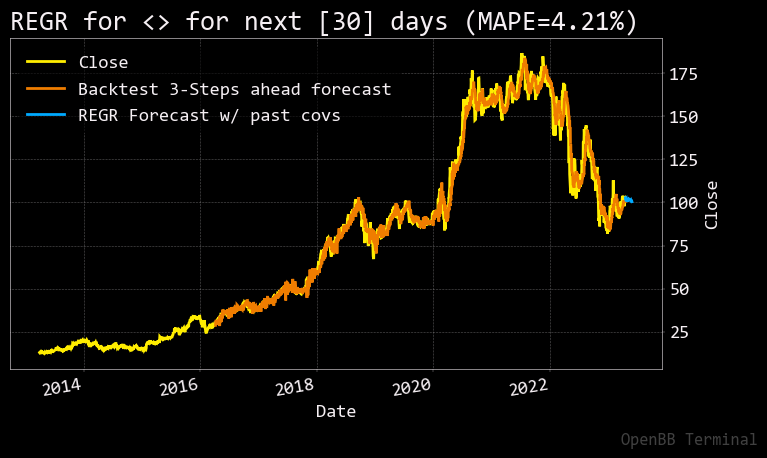

   Actual price: 102.30    
┏━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Datetime   ┃ Prediction ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ 2023-04-19 │ 102.77     │
├────────────┼────────────┤
│ 2023-04-20 │ 102.27     │
├────────────┼────────────┤
│ 2023-04-21 │ 101.90     │
├────────────┼────────────┤
│ 2023-04-24 │ 102.25     │
├────────────┼────────────┤
│ 2023-04-25 │ 101.27     │
├────────────┼────────────┤
│ 2023-04-26 │ 102.53     │
├────────────┼────────────┤
│ 2023-04-27 │ 101.65     │
├────────────┼────────────┤
│ 2023-04-28 │ 101.32     │
├────────────┼────────────┤
│ 2023-05-01 │ 102.27     │
├────────────┼────────────┤
│ 2023-05-02 │ 101.00     │
├────────────┼────────────┤
│ 2023-05-03 │ 100.37     │
├────────────┼────────────┤
│ 2023-05-04 │ 101.42     │
├────────────┼────────────┤
│ 2023-05-05 │ 101.11     │
├────────────┼────────────┤
│ 2023-05-08 │ 102.09     │
├────────────┼────────────┤
│ 2023-05-09 │ 102.21     │
├────────────┼────────────┤
│ 2023-05-10 │ 102.13     │
├────────────┼────────────┤
│ 2023-05-11 │ 101.56     │
├────────────┼────────────┤
│ 2023-05-12 │ 101.49     │
├────────────┼────────────┤
│ 2023-05-15 │ 101.22     │
├────────────┼────────────┤
│ 2023-05-16 │ 100.84     │
├────────────┼────────────┤
│ 2023-05-17 │ 101.16     │
├────────────┼────────────┤
│ 2023-05-18 │ 101.24     │
├────────────┼────────────┤
│ 2023-05-19 │ 101.36     │
├────────────┼────────────┤
│ 2023-05-22 │ 101.17     │
├────────────┼────────────┤
│ 2023-05-23 │ 101.68     │
├────────────┼────────────┤
│ 2023-05-24 │ 100.90     │
├────────────┼────────────┤
│ 2023-05-25 │ 101.12     │
├────────────┼────────────┤
│ 2023-05-26 │ 100.87     │
├────────────┼────────────┤
│ 2023-05-29 │ 100.83     │
├────────────┼────────────┤
│ 2023-05-30 │ 100.48     │
└────────────┴────────────┘

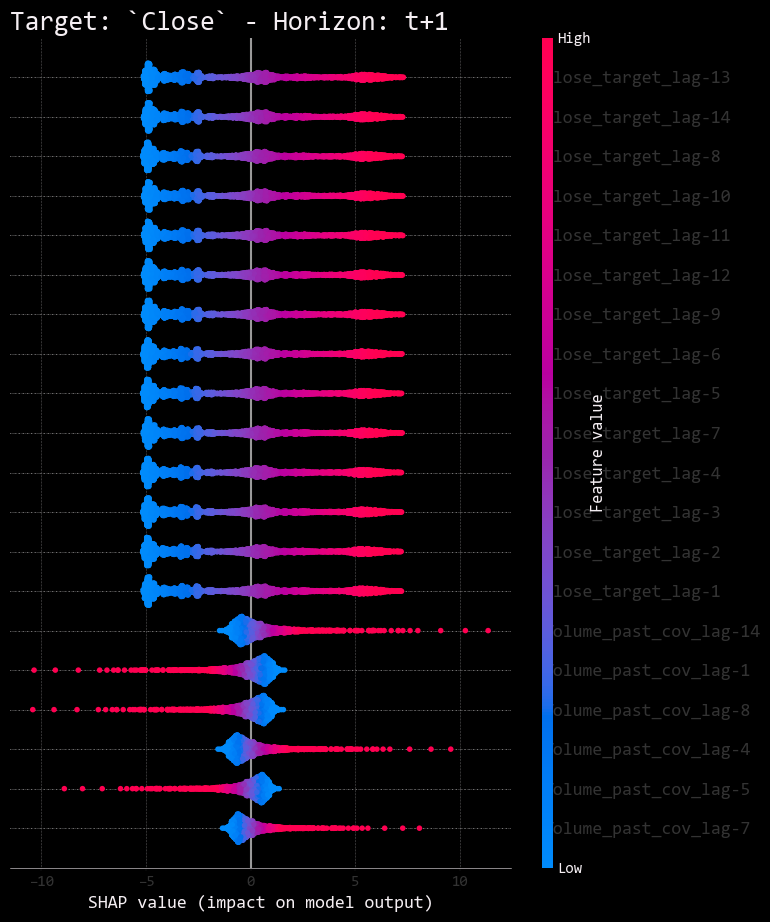

<Figure size 640x480 with 0 Axes>

In [289]:
# Target the Volume column as a past-covariate
openbb.forecast.regr_chart(amzn, target_column = 'Close', n_predict= 30, past_covariates="Volume", train_split=.30, forecast_horizon= 3)